![UKDS Logo](./UKDS_Logos_Col_Grey_300dpi.png)

# Data Pre-processing: Integrate, Clean, Reduce and Transform

Welcome to the <a href="https://ukdataservice.ac.uk/" target=_blank>UK Data Service</a> training series on *Computational Social Science*. This series guides you through some of the most common and valuable new sources of data available for social science research: data collected from websites, social media platorms, text data, conducting simulations (agent based modelling), to name a few. To help you get to grips with these new forms of data, we provide webinars, interactive notebooks containing live programming code, reading lists and more.

* To access training materials for the entire series: <a href="https://github.com/UKDataServiceOpen/computational-social-science" target=_blank>[Training Materials]</a>

* To keep up to date with upcoming and past training events: <a href="https://ukdataservice.ac.uk/news-and-events/events" target=_blank>[Events]</a>

* To get in contact with feedback, ideas or to seek assistance: <a href="https://ukdataservice.ac.uk/help.aspx" target=_blank>[Help]</a>

UK Data Service  <br />
University of Manchester <br />

## Table of Content
**1.  Introduction**

    1.1  Aims
    
    1.2  Lesson details

**2.  Guide to using this resource**

    2.1  Interaction

    2.2  Learn more
    
**3. Data integration**

    3.1 Join data

**4. Data cleaning **
    
    4.1 Missing data
    
    4.2 Noisy data
    
**5. Data reduction **

    5.1 Correlation analysis
    
    5.2 Principal component analysis
    
**6. Data transformation **
    
    6.1 One-hot encoding
    
    6.2 Normalisation
    
        6.2.1 Z-score normalisaiton
        
        6.2.2 Min-max normalisation

## 1. Introduction

Data pre-processing (a.k.a. data preparation) is the process of manipulating or pre-processing raw data from one or more sources into a structured and clean data set for analysis. It is an important part of Data Analytics. When the data has been fully prepared, it is then ready for further analysis like classification, association, prediction, and clustering of data.

Rather than developing the fancy algorithms or plot the eye-catching figures, much time and effort are spent on data collection and preparation. Forbes found that “Data preparation accounts for about 80% of the work of data scientists”. In particular, 19% is spent on collecting data sets and 69% is spent on cleaning and organising data. 

The data set used in this practice is a transformed version of the classic Titanic data. You can find the source and data dictionary <a href="https://www.kaggle.com/c/titanic/data" target=_blank>here</a>.

### Aims

This lesson - Data Pre-processing: Integrate, Clean, Reduce and Transform - has 2 aims:
1. Get familiar with commands in Python. 
2. Know how to perform some basic data pre-processing tasks in Python. 

### Lesson details


* **Level**: Introductory, for individuals with no prior knowledge or experience of data pre-processing.
* **Duration**: 35-45 minutes.
* **Pre-requisites**: None.
* **Audience**: Researchers and analysts from any disciplinary background interested in data pre-processing in Python.
* **Programming language**: Python.

## 2. Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Overview*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `In []`.**

To execute a cell, click or double-click the cell and press the `Run` button on the top toolbar (you can also use the keyboard shortcut `Shift + Enter`).

Try it for yourself:

In [1]:
print("Enter your name and press enter:")
name = input()
print("\r")
print("Hello {}, enjoy learning more about data pre-processing!".format(name))

Enter your name and press enter:
Julia

Hello Julia, enjoy learning more about data pre-processing!


### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

## 3. Data Integration 



By definition, Data integration is combining data from multiple sources into a unified view. The benefits include: 
- To improve data quality
- To enrich data with additional information
- To allow reliable data analytics and beyond

Usually, Integrating in-house data within data warehouse together is relatively straightforward (with common attributes and structures across schemas).

### Join Data 

Here we are going to look at how to join tabular data with `pandas` library. Joining tables enable you to extract and simultaneously process data from more than one table.There are four types of join: inner, outer, left and right.

First, let's inspect the data sets.

In [2]:
# import packages
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset/matrices


In [3]:
# import datasets 
titan=pd.read_csv('titanic.csv')
titan_survival=pd.read_csv('titanic - survival.csv')
titan_features=pd.read_csv('titanic - features.csv')

In [4]:
# present the tables 1
titan_survival.head(10)

,Survived,Name
0,0,Mr. Owen Harris Braund
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,1,Miss. Laina Heikkinen
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,0,Mr. William Henry Allen
5,0,Mr. James Moran
6,0,Mr. Timothy J McCarthy
7,0,Master. Gosta Leonard Palsson
8,1,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson
9,1,Mrs. Nicholas (Adele Achem) Nasser


In [5]:
# present the tables 2
titan_features.head()

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked
0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,S
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,C
2,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,S
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,S
4,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,S


In [6]:
# the size of the data
titan_survival.shape, titan_features.shape

((882, 2), (887, 8))

In [7]:
# merge the tables based on Name with the parameters, and assign it to a new variable
merge1=pd.merge(titan_features, titan_survival, left_on='Name', right_on='Name')

In [8]:
merge1

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked,Survived
0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,S,0
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,C,1
2,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,S,1
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,S,1
4,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
877,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,S,0
878,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,S,1
879,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,S,0
880,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,Q,1


Notice that the merged dataset has 882 rows. This is because the method used `inner join` by default. It only kept the rows that are shared by both tables. 

Now, let's try to add the parameter `how` to the function. 

In [9]:
# outer merge the tables based on Name with the parameters, and assign it to a new variable
merge2=pd.merge(titan_features, titan_survival, left_on='Name', right_on='Name', how='outer')

In [10]:
merge2

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked,Survived
0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,S,0.0
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,C,1.0
2,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,S,1.0
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,S,1.0
4,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...
882,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,S,0.0
883,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,S,1.0
884,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,S,0.0
885,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,Q,1.0


In [11]:
# inspect the missing values in the merged dataset 
merge2[merge2.Survived.isnull()]

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked,Survived
88,3,Mr. Francesco Celotti,male,24.0,0,0,8.0500,S,NaN
89,3,Mr. Emil Christmann,male,29.0,0,0,8.0500,S,NaN
90,3,Mr. Paul Edvin Andreasson,male,20.0,0,0,7.8542,S,NaN
91,1,Mr. Herbert Fuller Chaffee,male,46.0,1,0,61.1750,S,NaN
92,3,Mr. Bertram Frank Dean,male,26.0,1,2,20.5750,S,NaN


Try `how='left'` and `how='right'` respectively and check the result. Left/Right refers to the order that's been put in the `merge` function.  Left join will keep all the rows in the left table, namely `titan_features` here, and right join will keep all the rows in the right table `titan_survival`. 

You can always check the documentation online, where you can find the relevant parameters,functions, examples, etc. Documentation for `pandas.merge` is available <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.merge.html" target=_blank>here</a>. 

You can export the newly merged data set now if you want. 

In [ ]:
merge1.to_csv('merged.csv', index=False)

## 4. Data Cleaning 

Data in the real world is dirty: 

- Incomplete or missing: lacking attribute values or certain attributes of interest, or containing only aggregate data

    e.g., occupation=“ ” (missing data), Jan. 1 as everyone’s birthday? (disguised missing data) 


- Inaccurate or noisy: containing errors or outliers

    e.g., salary=“-10” (an error) 


- Inconsistent: containing discrepancies in codes or names

    e.g., age = “42” and birthday=“03/07/1997”


### Incomplete/Missing Data 

Data is not always available, e.g., many rows have no recorded value for several attributes, such as customer income in sales data.

Missing data may be due to 
- Equipment malfunction 
- Inconsistent with other recorded data and thus deleted 
- Data not entered due to misunderstanding 
- Certain data may not be considered important at the time of entry 
- No recorded history or changes of the data



**Possible Solutions:**

Throw out the records with missing values? 
■ No? This creates a bias for the sample

Delete the column with missing values? 
■ No? Only if the column data is unnecessary

Replace missing values with a “special” value (e.g., -99)? 
■ No. This resembles any other value to data analytics. 

Replace with some “typical” value? mean, median, or mode? 
■ Maybe. Possible changes to the distribution. 

Impute a value? (Imputed values should be flagged.) 
■ Maybe. Use distribution of values to randomly choose a value. 

Use data mining techniques that can handle missing values? 
■ Yes. For example, decision tree can be applicable. 

Partition records and build multiple models? 
■ Yes. This is possible when data isn’t insufficient.



### Inaccurate/Noisy Data

Noise: random error or variance in a measured variable 

Incorrect attribute values may be due to 
- Faulty data collection instruments 
- Data entry problems 
- Data transmission problems 
- Technology limitation 
- Inconsistency in naming convention

**Possible Solutions:**

Binning and smoothing: Sort data and partition into bins (equal-width, equal-depth), Smooth by bin means, median, or boundaries, etc. 

Regression: Smooth by fitting the data into a function with regression 

Clustering: Detect and remove outliers that fall outside clusters  

Combined computer and human inspection: Detect suspicious values and check by human (e.g., deal with possible outliers)


In [12]:
# check the missing values
titan.isnull().sum()

Survived                   0
Pclass                     5
Name                       0
Sex                        0
Age                        8
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Embarked                   0
dtype: int64

In [13]:
# get the quote and count of the unique values of 'Class'
titan.Pclass.value_counts()

3.0    485
1.0    216
2.0    181
Name: Pclass, dtype: int64

In [14]:
# fill in with mode Class
titan.Pclass.fillna(3.0, inplace=True)

In [15]:
# get the mean age
mean_age=titan.Age.mean()
print(mean_age)

29.46777019340159


In [16]:
# fill in with mean age 
titan.Age.fillna(mean_age, inplace=True)

**Tips:**

Add parameter 'method{‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}' to define the way of filling holes. 

'pad'/'ffill': propagate last valid observation forward to next valid 

'backfill'/'bfill': use next valid observation to fill gap.

Alternatively, you can simply use `titan.dropna(inplace=True)` to remove rows with missing values.

In [17]:
# check the missing values again
titan.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
Embarked                   0
dtype: int64

However, no missing values doesn't mean that the data set is entirely clean. There can be some noise in disguise. 
 
We can check whether the min and max is out of range. 

Also,we can check the unique values to make sure that they all make sense.For example, from the data dictionary we know that there are 3 ports of embarkation. C = Cherbourg, Q = Queenstown, S = Southampton. Check whether a fourth one exists as a mistake. 

In [18]:
# check min and max
titan.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.308906,29.467770,0.525366,0.383315,32.30542
std,0.487004,0.837442,14.059262,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.750000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [19]:
# check no noise
titan.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

Also, by inspecting the data set again we find that `Age` and `Pclass` are floats rather than integers as we expected. 

We can change the type of the two columns. 

In [20]:
titan

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked
0,0,3.0,Mr. Owen Harris Braund,male,29.46777,1,0,7.2500,S
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,29.46777,1,0,71.2833,C
2,1,3.0,Miss. Laina Heikkinen,female,29.46777,0,0,7.9250,S
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,29.46777,1,0,53.1000,S
4,0,3.0,Mr. William Henry Allen,male,29.46777,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
882,0,2.0,Rev. Juozas Montvila,male,27.00000,0,0,13.0000,S
883,1,1.0,Miss. Margaret Edith Graham,female,19.00000,0,0,30.0000,S
884,0,3.0,Miss. Catherine Helen Johnston,female,7.00000,1,2,23.4500,S
885,1,1.0,Mr. Karl Howell Behr,male,26.00000,0,0,30.0000,Q


In [21]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    float64
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
 8   Embarked                 887 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 62.5+ KB


In [22]:
titan.astype({'Age':'int64'})

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Embarked
0,0,3.0,Mr. Owen Harris Braund,male,29,1,0,7.2500,S
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,29,1,0,71.2833,C
2,1,3.0,Miss. Laina Heikkinen,female,29,0,0,7.9250,S
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,29,1,0,53.1000,S
4,0,3.0,Mr. William Henry Allen,male,29,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
882,0,2.0,Rev. Juozas Montvila,male,27,0,0,13.0000,S
883,1,1.0,Miss. Margaret Edith Graham,female,19,0,0,30.0000,S
884,0,3.0,Miss. Catherine Helen Johnston,female,7,1,2,23.4500,S
885,1,1.0,Mr. Karl Howell Behr,male,26,0,0,30.0000,Q


In [23]:
# remember to assign result to the original variable to keep the change  
titan=titan.astype({'Age':'int64', 'Pclass':'int64'})

## 5. Data Reduction

**Why data reduction? **

- A database/data warehouse may store terabytes of data 
- Complex analysis may take a very long time to run on the complete data set


**Data reduction:** 

- Obtain a reduced representation of the data set - much smaller in volume but yet produces almost the same analytical results

**Dimensionality reduction:**

- Remove redundant and irrelevant attributes 
- Principal component analysis (PCA) 
- Variable clustering 
- Featuring engineering 

**Numerosity reduction: **
- Sampling techniques 
- Regression and log-linear models 
- Histograms, clustering


In today's practice, we are going to perform two dimensionality reduction explorations- Correlation check and Principal Component Analysis (PCA). 

Both of them target at numerical features. Therefore, we need to extract the numerical attributes first.

In [24]:
# split the data
titan2=titan[['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
titan2

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,29,1,0,7.2500
1,29,1,0,71.2833
2,29,0,0,7.9250
3,29,1,0,53.1000
4,29,0,0,8.0500
...,...,...,...,...
882,27,0,0,13.0000
883,19,0,0,30.0000
884,7,1,2,23.4500
885,26,0,0,30.0000


### Correlation Analysis for Numeric Variables 

Correlation between two variables x1 and x2 is the standard covariance, obtained by normalising the covariance with the standard deviation of each variable. 

Sample correlation for two attributes x1 and x2: 
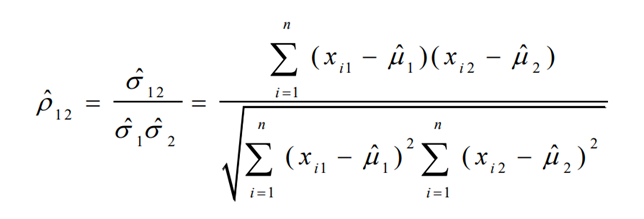

where n is the number of samples, µ1 and µ2 are the respective means, σ1 and σ2 are the respective standard deviation of x1 and x2 

If ρ12 > 0: x1 and x2 are positively correlated (x1 ’s values increase as x2 ’s increase) 

If ρ12 = 0: independent 

If ρ12 < 0: negatively correlated

In [25]:
# correlation check again 
corr=titan2.corr()

In [26]:
corr

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Age,1.000000,-0.293180,-0.191889,0.110678
Siblings/Spouses Aboard,-0.293180,1.000000,0.414244,0.158839
Parents/Children Aboard,-0.191889,0.414244,1.000000,0.215470
Fare,0.110678,0.158839,0.215470,1.000000


In [27]:
# visualise the correlation matrix
corr.style.background_gradient(cmap='coolwarm')

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Age,1.000000,-0.293180,-0.191889,0.110678
Siblings/Spouses Aboard,-0.293180,1.000000,0.414244,0.158839
Parents/Children Aboard,-0.191889,0.414244,1.000000,0.215470
Fare,0.110678,0.158839,0.215470,1.000000


No clear correlated feature pair is reported. Therefore, we don't have to drop any feature. 

You can also use ANOVA or Chi-square test if categorical variables are involved.

### Principal Component Analysis (PCA)

Principal components are constructed as mathematical transformations of the input variables. Each is an uncorrelated, linear combination of original input variables. The components can be written as a sum of loadings onto variables, e.g.
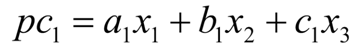
where e.g. a1, b1, c1 are called as loadings

The coefficients of such a linear combination are the eigenvectors of the correlation or covariance matrix. 

The principal components are sorted by descending order of the eigenvalues. 

The eigenvalues represent the variances of the principal components.

PCA is by far the most popular dimensionality reduction technique, especially if there are many many attributes. For example, for a data set of a million attributes, we can just use 100 PCs to capture their variance, as a small number of principal components can explain a lot of the variation in the data cloud. 

But the disadvantage is that it’s difficult or impossible to interpret the constructed principal components. 

**N.B.** PCA is effected by scale so you need to scale the features in your data before applying PCA.

In [28]:
# import package and build a PCA model of 2 principal components, then transform and fit
# save the result 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc=pca.fit_transform(titan2)

In [29]:
# get the explained variance ratio
pca.explained_variance_ratio_

array([0.92641101, 0.07296904])

In [30]:
# transform the result to a data set
principalDf = pd.DataFrame(data = pc, columns = ['principal component 1', 'principal component 2'])

In [31]:
principalDf

,principal component 1,principal component 2
0,-25.055569,0.392144
1,38.940118,-1.770630
2,-24.384424,0.394327
3,20.767499,-1.156475
4,-24.259498,0.390105
...,...,...
882,-19.380243,-1.775157
883,-2.661582,-10.341634
884,-9.604383,-22.159277
885,-2.424148,-3.348381


In [32]:
# add the output feature
principalDf['Survived']=titan['Survived']

In [33]:
# voila! the new data set with only two features
principalDf

,principal component 1,principal component 2,Survived
0,-25.055569,0.392144,0
1,38.940118,-1.770630,1
2,-24.384424,0.394327,1
3,20.767499,-1.156475,1
4,-24.259498,0.390105,0
...,...,...,...
882,-19.380243,-1.775157,0
883,-2.661582,-10.341634,1
884,-9.604383,-22.159277,0
885,-2.424148,-3.348381,1


## 6. Data Transformation

A function that maps the entire set of values of a given attribute to a new set of replacement values, s.t., each old value can be identified with one of the new values 

**Methods/Examples:**
- Standardise numeric values
- Change counts into percentages. 
- Translate dates to durations. 
- Capture trends with ratios, differences, etc. 
- Replace categorical values with appropriate numeric values

### One-hot Encoding

One hot encoding is a very common data transformation, where binary variables are used to replace a categorical variable. 

Some algorithms can work with categorical data directly, e.g., a decision tree.But Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical data must be converted to a numerical form.

If the categorical variable is an output variable, you may also want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

Here, we use `pd.get_dummies` to transform `Sex`, `Pclass`, and `Embarked`.

In [34]:
titan_encoded=pd.get_dummies(titan, columns=['Sex', 'Pclass','Embarked'])
titan_encoded

,Survived,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,Mr. Owen Harris Braund,29,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,29,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,Miss. Laina Heikkinen,29,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,29,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,Mr. William Henry Allen,29,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,Rev. Juozas Montvila,27,0,0,13.0000,0,1,0,1,0,0,0,1
883,1,Miss. Margaret Edith Graham,19,0,0,30.0000,1,0,1,0,0,0,0,1
884,0,Miss. Catherine Helen Johnston,7,1,2,23.4500,1,0,0,0,1,0,0,1
885,1,Mr. Karl Howell Behr,26,0,0,30.0000,0,1,1,0,0,0,1,0


### Normalisation 
Normalisation/ Standardisation: scale data to fall within a smaller, specified range 
- Min-max normalisation 
- Z-score normalisation 
- Normalisation by decimal scaling

In this practice, we are going to apply z-score normalisation and min-max normalisation.

To perform normalisation, we need to select the numerical variables first. 


In [35]:
# split the data set
titan_nu=titan[['Age', 'Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
titan_nu

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,29,1,0,7.2500
1,29,1,0,71.2833
2,29,0,0,7.9250
3,29,1,0,53.1000
4,29,0,0,8.0500
...,...,...,...,...
882,27,0,0,13.0000
883,19,0,0,30.0000
884,7,1,2,23.4500
885,26,0,0,30.0000


In [36]:
# import packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

## Z-Score Normalisation
Simply put, a z-score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it is the distance between the raw score and the population mean in the unit of the standard deviation. It is usually a requirement for the optimal performance of many machine learning algorithms. 

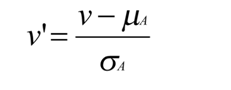
where (μ: mean, σ: standard deviation)

Here we use `StandardScaler` to do this task.

In [37]:
# build the scaler model
scaler1 = StandardScaler()
# fit using the train set
scaler1.fit(titan_nu)
# transform the test test
scaled1 = scaler1.transform(titan_nu)

In [38]:
# transform the result into a data set
transformed1=pd.DataFrame(scaled1, columns=[ 'Age', 'Siblings/Spouses Aboard','Parents/Children Aboard','Fare'])
transformed1.describe()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,8.870000e+02,8.870000e+02,8.870000e+02,8.870000e+02
mean,-8.811691e-17,1.602126e-17,-1.702259e-17,1.301727e-16
std,1.000564e+00,1.000564e+00,1.000564e+00,1.000564e+00
min,-2.094506e+00,-4.758557e-01,-4.749808e-01,-6.493034e-01
25%,-6.364107e-01,-4.758557e-01,-4.749808e-01,-4.900196e-01
50%,-1.029612e-01,-4.758557e-01,-4.749808e-01,-3.587899e-01
75%,6.083049e-01,4.299039e-01,-4.749808e-01,-2.347391e-02
max,3.595622e+00,6.770221e+00,6.959866e+00,9.647949e+00


In [39]:
transformed1

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,-0.031835,0.429904,-0.474981,-0.503586
1,-0.031835,0.429904,-0.474981,0.783412
2,-0.031835,-0.475856,-0.474981,-0.490020
3,-0.031835,0.429904,-0.474981,0.417948
4,-0.031835,-0.475856,-0.474981,-0.487507
...,...,...,...,...
882,-0.174088,-0.475856,-0.474981,-0.388018
883,-0.743101,-0.475856,-0.474981,-0.046336
884,-1.596620,0.429904,2.003301,-0.177984
885,-0.245214,-0.475856,-0.474981,-0.046336


## Min-Max Normalisation

Min-max normalization is one of the most common ways to normalize data. For every feature, the minimum value of that feature gets transformed into a 0, the maximum value gets transformed into a 1, and every other value gets transformed into a decimal between 0 and 1.

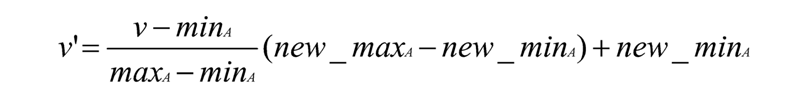

In [40]:
# build the scaler model
scaler2 = MinMaxScaler()
# fit using the train set
scaler2.fit(titan_nu)
# transform the test test
scaled2 = scaler2.transform(titan_nu)

In [41]:
# transform the result into a data set
transformed2=pd.DataFrame(scaled2, columns=[ 'Age', 'Siblings/Spouses Aboard','Parents/Children Aboard','Fare'])
transformed2.describe()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000
mean,0.368095,0.065671,0.063886,0.063056
std,0.175842,0.138084,0.134578,0.097168
min,0.000000,0.000000,0.000000,0.000000
25%,0.256250,0.000000,0.000000,0.015469
50%,0.350000,0.000000,0.000000,0.028213
75%,0.475000,0.125000,0.000000,0.060776
max,1.000000,1.000000,1.000000,1.000000


## Bibliography
- García, S., Luengo, J. and Herrera, F., 2015. *Data preprocessing in data mining* New York: Springer.
- Yu-wang Chen,2019, “Understanding Data and Their Environment- Data Preprocessing”lectures, University of Manchester
